# Personalización de Matplotlib: Configuraciones y hojas de estilo

La configuración de trazado predeterminada de Matplotlib suele ser objeto de quejas entre sus usuarios.
Aunque está previsto que cambien muchas cosas en la versión 2.0 de Matplotlib a finales de 2016, la capacidad de personalizar la configuración predeterminada ayuda a adaptar el paquete a sus propias preferencias estéticas.
Aquí repasaremos algunas de las opciones de configuración de tiempo de ejecución (rc) de Matplotlib y echaremos un vistazo a la función *hojas de estilo* más nueva, que contiene algunos buenos conjuntos de configuraciones predeterminadas.

## Personalización del gráfico a mano
A lo largo de este capítulo, hemos visto cómo es posible ajustar la configuración de la trama individual para terminar con algo que se ve un poco mejor que el predeterminado.
Es posible hacer estas personalizaciones para cada parcela individual.
Por ejemplo, aquí hay un histograma predeterminado bastante monótono:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

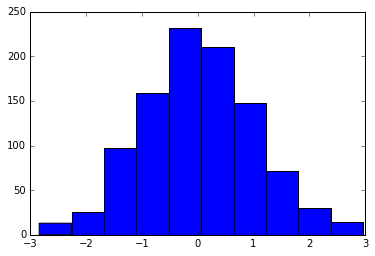

In [ ]:
x = np.random.randn(1000)
plt.hist(x);

Podemos ajustar esto a mano para que sea una trama mucho más agradable a la vista:

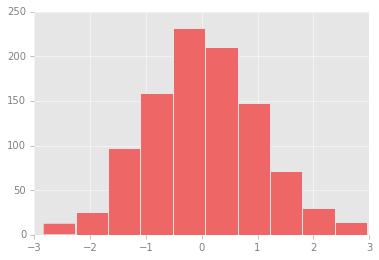

In [ ]:
# use a gray background
ax = plt.axes(axisbg='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

Esto se ve mejor, y es posible que reconozca el aspecto inspirado en el paquete de visualización ggplot del lenguaje R.
¡Pero esto requirió mucho esfuerzo!
Definitivamente no queremos tener que hacer todos esos ajustes cada vez que creamos una trama.
Afortunadamente, hay una forma de ajustar estos valores predeterminados una vez que funcionará para todas las parcelas.

## Cambiar los valores predeterminados: ``rcParams``
Cada vez que se carga Matplotlib, define una configuración de tiempo de ejecución (rc) que contiene los estilos predeterminados para cada elemento de trazado que cree.
Esta configuración se puede ajustar en cualquier momento usando la rutina de conveniencia ``plt.rc``.
Veamos cómo se ve modificar los parámetros rc para que nuestro gráfico predeterminado se vea similar a lo que hicimos antes.
Comenzaremos guardando una copia del diccionario ``rcParams`` actual, para que podamos restablecer fácilmente estos cambios en la sesión actual:

In [ ]:
IPython_default = plt.rcParams.copy()

Ahora podemos usar la función ``plt.rc`` para cambiar algunas de estas configuraciones:

In [ ]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

Con estas configuraciones definidas, ahora podemos crear una trama y ver nuestras configuraciones en acción:

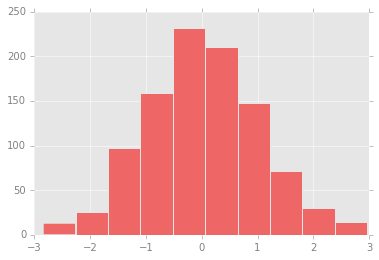

In [ ]:
plt.hist(x);

Veamos cómo se ven los diagramas de líneas simples con estos parámetros rc:

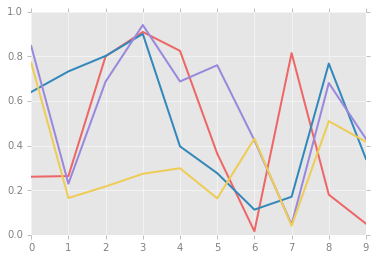

In [ ]:
for i in range(4):
    plt.plot(np.random.rand(10))

Encuentro esto mucho más agradable estéticamente que el estilo predeterminado.
Si no está de acuerdo con mi sentido estético, la buena noticia es que puede ajustar los parámetros rc para que se adapten a sus propios gustos.
Esta configuración se puede guardar en un archivo *.matplotlibrc*, sobre el que puede leer en [Matplotlib documentation](http://Matplotlib.org/users/customizing.html).
Dicho esto, prefiero personalizar Matplotlib usando sus hojas de estilo.

## Hojas de estilo
El lanzamiento de la versión 1.4 de Matplotlib en agosto de 2014 agregó un módulo ``estilo`` muy conveniente, que incluye una serie de nuevas hojas de estilo predeterminadas, así como la capacidad de crear y empaquetar sus propios estilos. Estas hojas de estilo tienen un formato similar a los archivos *.matplotlibrc* mencionados anteriormente, pero deben nombrarse con la extensión *.mplstyle*.
Incluso si no crea su propio estilo, las hojas de estilo incluidas por defecto son extremadamente útiles.
Los estilos disponibles se enumeran en ``plt.style.disponible``—aquí enumeraré solo los primeros cinco por brevedad:

In [ ]:
plt.style.available[:5]

['fivethirtyeight',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'ggplot',
 'grayscale']

La forma básica de cambiar a una hoja de estilo es llamar
``` python
plt.style.use('stylename')
```
¡Pero tenga en cuenta que esto cambiará el estilo para el resto de la sesión!
Alternativamente, puede usar el administrador de contexto de estilo, que establece un estilo temporalmente:
``` python
with plt.style.context('stylename'):
    make_a_plot()
```


Vamos a crear una función que hará dos tipos básicos de gráficos:

In [ ]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

Usaremos esto para explorar cómo se ven estos gráficos usando los diversos estilos incorporados.

### Estilo por Defecto
El estilo predeterminado es el que hemos visto hasta ahora a lo largo del libro; vamos a empezar con eso.
Primero, restablezcamos nuestra configuración de tiempo de ejecución al valor predeterminado de la computadora portátil:

In [ ]:
# reset rcParams
plt.rcParams.update(IPython_default);

Ahora veamos cómo se ve:

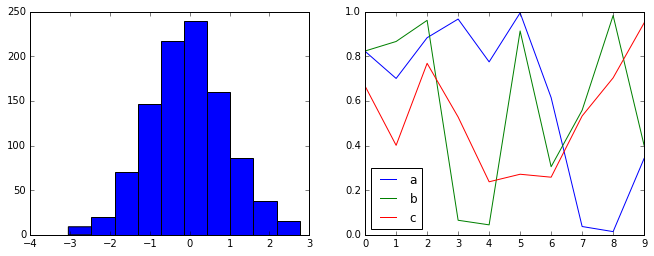

In [ ]:
hist_and_lines()

### Estilo FiveThirtyEight
El estilo ``fivethirtyeight`` imita los gráficos que se encuentran en el popular [FiveThirtyEight website](https://fivethirtyeight.com).
Como puede ver aquí, se caracteriza por colores llamativos, líneas gruesas y ejes transparentes:

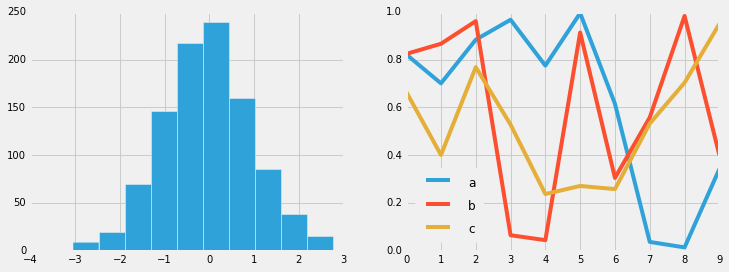

In [ ]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot
El paquete ``ggplot`` en lenguaje R es una herramienta de visualización muy popular.
El estilo ``ggplot`` de Matplotlib imita los estilos predeterminados de ese paquete:

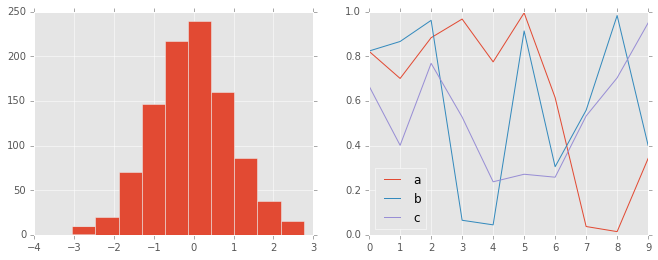

In [ ]:
with plt.style.context('ggplot'):
    hist_and_lines()

### *Métodos Bayesianos para Hackers (estilo
Hay un libro corto en línea muy bueno llamado [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); presenta figuras creadas con Matplotlib y utiliza un buen conjunto de parámetros rc para crear un estilo coherente y visualmente atractivo en todo el libro.
Este estilo se reproduce en la hoja de estilo ``bmh``:

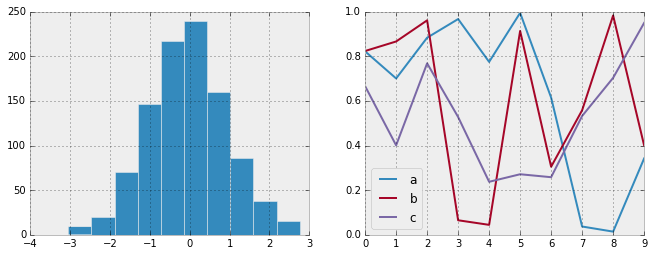

In [ ]:
with plt.style.context('bmh'):
    hist_and_lines()

### Fondo oscuro
Para las figuras utilizadas en las presentaciones, a menudo es útil tener un fondo oscuro en lugar de claro.
El estilo ``dark_background`` proporciona esto:

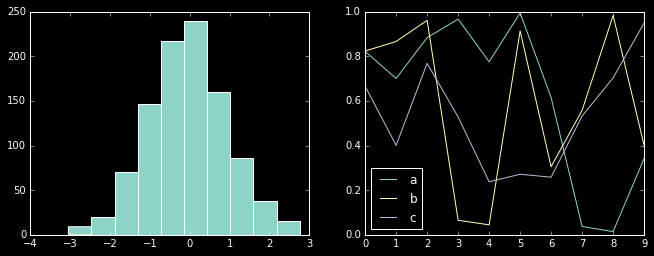

In [ ]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Escala de grises
A veces puede encontrarse preparando figuras para una publicación impresa que no acepta figuras en color.
Para esto, el estilo ``escala de grises``, que se muestra aquí, puede ser muy útil:

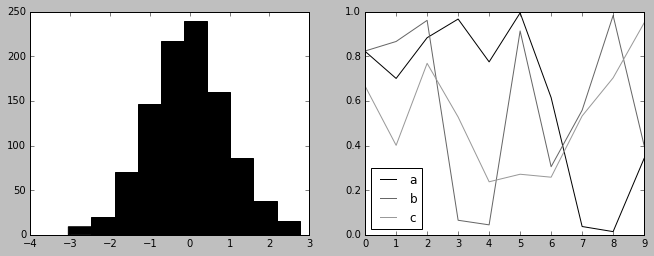

In [ ]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Estilo marinero
Matplotlib también tiene hojas de estilo inspiradas en la biblioteca Seaborn (discutido con más detalle en [Visualización con Seaborn](04.14-Visualización-con-Seaborn.ipynb)).
Como veremos, estos estilos se cargan automáticamente cuando Seaborn se importa a un cuaderno.
He encontrado que estas configuraciones son muy buenas y tiendo a usarlas como predeterminadas en mi propia exploración de datos.

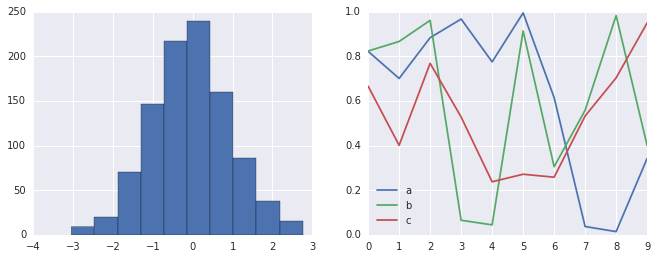

In [ ]:
import seaborn
hist_and_lines()

Con todas estas opciones integradas para varios estilos de trazado, Matplotlib se vuelve mucho más útil tanto para la visualización interactiva como para la creación de figuras para publicación.
A lo largo de este libro, generalmente usaré una o más de estas convenciones de estilo al crear tramas.